## Question 1

In [1]:
import os
import time
import numpy as np
import time

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, ConcatDataset, SubsetRandomSampler, random_split
from torch.optim import lr_scheduler
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim

import transformers

from tqdm import tqdm

import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

%matplotlib inline

f:\oxford_research\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


f:\oxford_research/102 flower/flowers


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


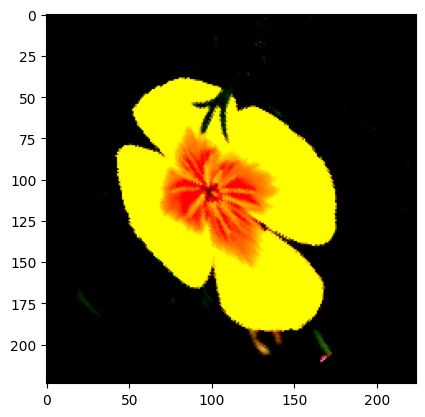

In [5]:
# os.chdir('../')
data_dir = os.getcwd() + '/102 flower/flowers'
print(data_dir)
input_shape = (3, 224, 224)  # C,W,H

# resize images to 224x224 to fit our transformer 
transformations = transforms.Compose(
    [
        transforms.Resize((input_shape[1], input_shape[2])),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(40),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)

train_data = ImageFolder(os.path.join(data_dir, 'train'), transform=transformations)
val_data = ImageFolder(os.path.join(data_dir, 'valid'), transform=transformations)
test_data = ImageFolder(os.path.join(data_dir, 'test'), transform=transformations)

dataset = ConcatDataset([train_data, val_data])

# Display a random image 
random_index = np.random.randint(0, len(dataset))
img = np.transpose(dataset[random_index][0], (1, 2, 0))
plt.imshow(img)
plt.show()